prueba muestra de las imagenes 

(374, 9, 60, 180)


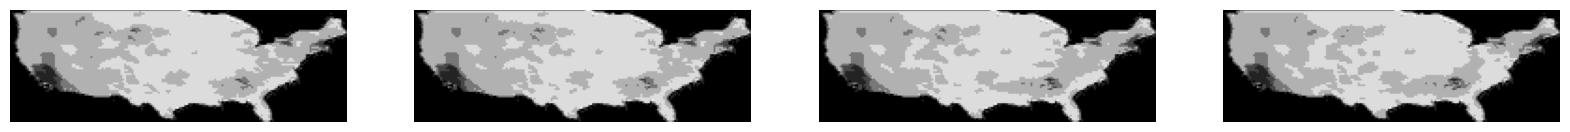

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the npy file
image_data = np.load('DroughtDatasetMask/dataset/ResultadosEspacioLatenteV1/v1w10/60_180Part0_0/x_test_mask.npy')
image_data = image_data.squeeze()
print(image_data.shape)

# Display 4 images 
plt.figure(figsize=(20, 20))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.axis('off')

(1254, 122, 360)


/tmp/ipykernel_492468/405135629.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i + 1)


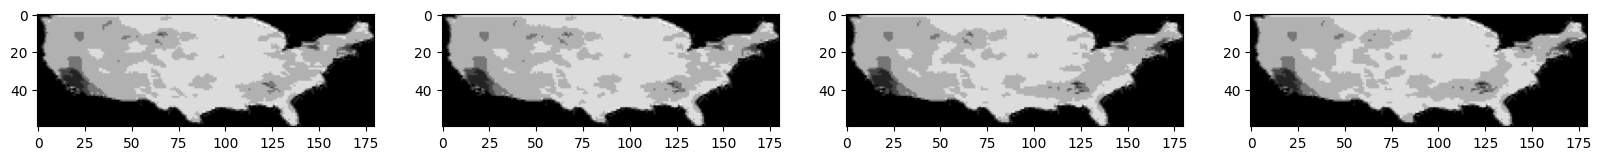

In [8]:
dataMask = np.load("DroughtDatasetMask/ActualizacionDataSetMani/imagenesMak1.npy")
print(dataMask.shape)

plt.figure(figsize=(20, 20))
i=0
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(dataMask[0], cmap='gray')
    plt.axis('off')
    plt.subplot(2, 4, i + 1)
    plt.imshow(image_data[i][0], cmap='gray')


Prueba de los cubos de imagenes

(374, 9, 60, 180)


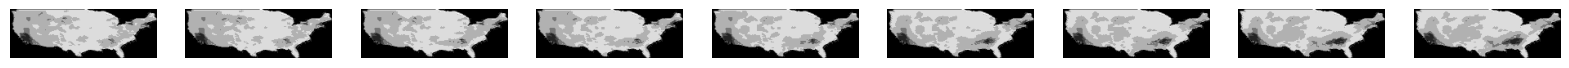

In [9]:

# Load the npy file
image_data = np.load('DroughtDatasetMask/dataset/ResultadosEspacioLatenteV1/v1w10/60_180Part0_0/x_test_mask.npy')
image_data = image_data.squeeze()
print(image_data.shape)

# Display 4 images 
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(image_data[0][i], cmap='gray')
    plt.axis('off')

Pueba separacion del dataset

In [34]:
from PIL import Image
def gray_quantized(img, palette):
  rows, cols = len(img), len(img[0])
  total_vals = 1
  for i in palette.shape:
    total_vals *= i
  palettedata = palette.reshape(total_vals).tolist()
  palImage = Image.new('L', (rows, cols))
  palImage.putpalette(palettedata*32)
  oldImage = Image.fromarray(img, 'L')
  newImage = quantizetopalette(oldImage,palImage, mode="L")
  res_image = np.asarray(newImage)
  return res_image

#Función para dada una paleta solo tomar los colores de esa paleta en la imagen
def quantizetopalette(silf, palette, dither=False, mode="P"):
  """Convert an RGB or L mode image to use a given P image's palette."""
  silf.load()
  palette.load()
  im = silf.im.convert(mode, 0, palette.im)
  # the 0 above means turn OFF dithering making solid colors
  return silf._new(im)

def recolor_greys_image(data, palette):
    rows, cols = len(data), len(data[0])
    aux = np.zeros((rows, cols), dtype=np.uint64)
    for i in range(rows):
        for j in range(cols):
            aux[i,j] = min(palette, key= lambda x:abs(x-data[i,j]))
    return aux

#Toma todos los colores existentes en la imagen
def get_colors(image):
  aux = []
  band = True
  for i in image:
    for j in i:

      for k in aux:
        if j.tolist() == k:
          band = False
          break
      if band:
        aux.append(j.tolist())
      band = True
  return np.array(aux)

def agroup_window(data, window):
    new_data = [data[i:window+i] for i in range(len(data)-window+1)]
    return np.array(new_data)

def create_shifted_frames_2(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, data.shape[1]-1, :, :]
    return x, y

In [40]:
categories = [0, 35, 70, 119, 177, 220, 255] 
window = 5

data1= np.load("DroughtDatasetMask/DataSetBordesAutomatico/Numpys/1x1/DroughtDatasetMask1x1.npy")

data2 = np.load("DroughtDatasetMask/DataSetBordesAutomatico/Numpys/1x1/DroughtDatasetMask1x1.npy")

channels = 1


print("Data1 shape: {}".format(data1.shape))
print("Data1 type: {}".format(data1.dtype))

rows, cols = data1.shape[1], data1.shape[2]

data1 = np.array([gray_quantized(i, np.array(categories)) for i in data1])
colors_greys = get_colors(data1[1168])
print(f"Colores {colors_greys}")
print(data1.shape)

data1_greys = np.array([recolor_greys_image(img, categories) for img in data1])
data1 = data1_greys.astype('float32') / 255
#print(get_colors(data1[1168]))
print(data1.shape)
 
print("Agrupando en ventanas")
x_2 = agroup_window(data1, window)
print(x_2.shape)

print("Dividiendo en train y test")
x_train = x_2[:int(len(x_2)*.7)] # Toma los primeos 70% de los datos
print("xtrain",x_train.shape)
x_test = x_2[int(len(x_2)*.7):] # Toma el 30% de los datos restantes
print("xtest",x_test.shape)

print ("Dividiendo en train y validation")
x_validation = x_train[int(len(x_train)*.8):] # Toma el 20% de los datos restantes
print("xvalidation",x_validation.shape)
x_train = x_train[:int(len(x_train)*.8)] # Toma los primeos 80% de los datos
print("xtrain",x_train.shape)

x_train = x_train.reshape(len(x_train), window, rows, cols, channels)
x_validation = x_validation.reshape(len(x_validation), window, rows, cols, channels)
x_test = x_test.reshape(len(x_test), window, rows, cols, channels)

print("xtrain",x_train.shape)
print("xvalidation",x_validation.shape)
print("xtest",x_test.shape)

x_train, y_train = create_shifted_frames_2(x_train)
x_validation, y_validation = create_shifted_frames_2(x_validation)
x_test, y_test = create_shifted_frames_2(x_test)

print("Training data1 shapes: {}, {}".format(x_train.shape, y_train.shape))
print("Validation data1 shapes: {}, {}".format(x_validation.shape, y_validation.shape))
print("Test data1 shapes: {}, {}".format(x_test.shape, y_test.shape))

#####################################################################################################
   
#print("Data2 shape: {}".format(data2.shape))
#print("Data2 type: {}".format(data2.dtype))
#
#rows, cols = data2.shape[1], data2.shape[2]
#
#data2 = np.array([gray_quantized(i, np.array(categories)) for i in data2])
#colors_greys = get_colors(data2[1168])
#print(f"Colores {colors_greys}")
#print(data2.shape)
#
#data2_greys = np.array([recolor_greys_image(img, categories) for img in data2])
#data2 = data2_greys.astype('float32') / 255
##print(get_colors(data2[1168]))
#print(data2.shape)
#
#x_2_2 = agroup_window(data2, window)
#print(x_2_2.shape)
#
#x_train2 = x_2_2[:int(len(x_2_2)*.7)] # Toma los primeos 70% de los datos
#print("xtrain",x_train2.shape)
#x_test2 = x_2_2[int(len(x_2_2)*.7):] # Toma el 30% de los datos restantes
#print("xtest",x_test2.shape)
#
#x_validation2 = x_train2[int(len(x_train2)*.8):] # Toma el 20% de los datos restantes
#print("xvalidation",x_validation2.shape)
#x_train2 = x_train2[:int(len(x_train2)*.8)] # Toma los primeos 80% de los datos
#print("xtrain",x_train2.shape)
#
#x_train2 = x_train2.reshape(len(x_train2), window, rows, cols, channels)
#x_validation2 = x_validation2.reshape(len(x_validation2), window, rows, cols, channels)
#x_test2 = x_test2.reshape(len(x_test2), window, rows, cols, channels)
#
#print("xtrain",x_train2.shape)
#print("xvalidation",x_validation2.shape)
#print("xtest",x_test2.shape)
#
#x_train2, y_train2 = create_shifted_frames_2(x_train2)
#x_validation2, y_validation2 = create_shifted_frames_2(x_validation2)
#x_test2, y_test2 = create_shifted_frames_2(x_test2)
#
#print("Training data2 shapes: {}, {}".format(x_train2.shape, y_train2.shape))
#print("Validation data2 shapes: {}, {}".format(x_validation2.shape, y_validation2.shape))
#print("Test data2 shapes: {}, {}".format(x_test2.shape, y_test2.shape))

Data1 shape: (1254, 122, 360)
Data1 type: uint8
Colores [  0   1   2   4   3 255   7   6   5 254 252 251 253 221 191 214 218 215
 172 176 178 175 177 173 216 213 224 226 167 225 194  78  70  68  69  71
  81 168 196 212 217 250 222 202 220 219 146  65  73  67 165 190 228 223
 210 187 199 179  77 138 227 174 115 198 193 153 130 230 189 208  75  89
  92  84 161 204 192 211 117  83 132  66  72 109 229 156 162  99 180 181
 206 231 171 158 134 111  95 129 154 209 188 232 183 182 195 127 159 201
 106 163 205 185 139 186  74 144 105 207 116 112 110 197 166  97 113 184
 136 124 150  86 149 137 169 170 203 140 143  85  80  79  98 104 125  64
 121  62  53  37  36  49 200 164  32  34  35  47  57 126 118  56  33  50
 107  31 135 148  61  38  90 249 248  52  82 108  40  54  39  41  63 151
 145 103  30  96 142 100  91  76 102 128 114 155 141 157 122 120  93 123
 147 160 133  88 152  60  58 101  59  46  51  94  55 233  43  28  42  29
 119  44  87  48  45 131  26]
(1254, 122, 360)
(1254, 122, 360)
(125

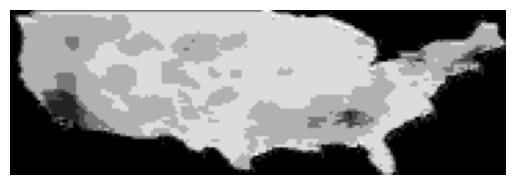

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Display the image
plt.imshow(x_test[0][0], cmap='gray')
plt.axis('off')
plt.show()


fin

In [21]:
import os
lista = []

def guardarNombresDeImagenes(imgName):
    lista.append(imgName)
        

    
    return lista        
def guardarEnExcel(lista):
    import pandas as pd
    df = pd.DataFrame(lista, columns = ['Index', 'Nombre'])
    df.to_excel('DroughtDatasetMask/DataSetBordesAutomatico/Prueba1/4X4/crop_10/imagenes4X4_10.xlsx', index=False)
    return df

# Ruta al directorio con imágenes originales
folder_path = 'DroughtDatasetMask/ActualizacionDataSetMani/imagenesMak1'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
image_files = sorted(image_files)

#print(image_files)
for i, file in enumerate(image_files):
    lista = guardarNombresDeImagenes(file)
    
    #imprimir el largo de la lista
print(len(lista))
print(lista[1253])
#guardarEnExcel(lista)



1254
2024-01-09.png


Shape: (1254, 122, 360)
Data Type: float64
Shapext: (1254, 122, 360)
Data Typext: uint8
Shapexte: (371, 4, 122, 360, 1)
Data Typexte: float32


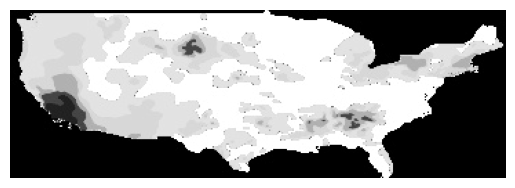

In [113]:
import numpy as np

# Load the npy file
data = np.load("DroughtDatasetMask/ActualizacionDataSetMani/imagenesMak1.npy")

dataXt = np.load("DroughtDatasetMask/DataSetBordesAutomatico/Numpys/1x1/DroughtDatasetMask1x1.npy")


dataxTe = np.load("/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/github/ImageComplete/DroughtDatasetMask/x_test_mask.npy")
# Print the shape and data type of the loaded array
print("Shape:", data.shape)
print("Data Type:", data.dtype)

print ("Shapext:", dataXt.shape)
print ("Data Typext:", dataXt.dtype)

print ("Shapexte:", dataxTe.shape)
print ("Data Typexte:", dataxTe.dtype)

# Display the image
plt.imshow(dataXt[865], cmap='gray')
plt.axis('off')
plt.show()


Shape img1: (4, 122, 360, 1)
shape img2: (4, 122, 360, 1)


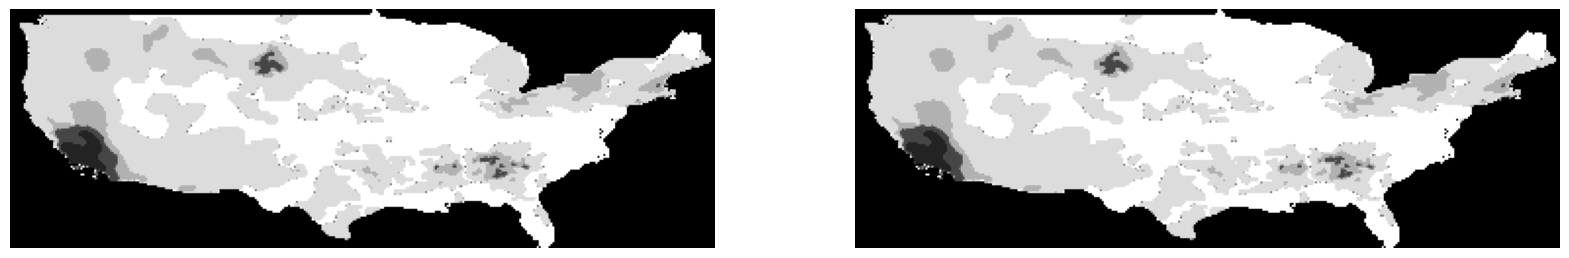

Shape img1: (122, 360, 1)
shape img2: (122, 360, 1)
[0.         0.13725491 0.27450982 0.46666667 0.69411767 0.8627451
 1.        ]
[0.         0.13725491 0.27450982 0.46666667 0.69411767 0.8627451
 1.        ]


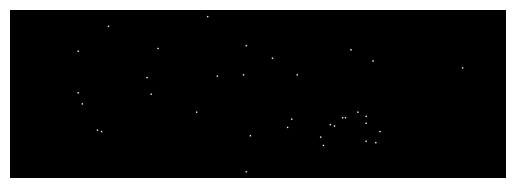

In [112]:
import numpy as np
#700+166=866
img1 = x_validation[166]
img2 = dataxTe[1]

print("Shape img1:", img1.shape)
print("shape img2:", img2.shape)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1[0], cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2[0], cmap='gray')
plt.axis('off')
plt.show()
img1 = img1.astype('float32') 
#img2 = img2.squeeze()
img1 = img1[0]
img2 = img2[0]
#img1 = np.expand_dims(img1, axis=-1)
print("Shape img1:", img1.shape)
print("shape img2:", img2.shape)
#print valores unicos
print(np.unique(img1))
print(np.unique(img2))
# Calcula la diferencia pixel a pixel
diff_array = np.abs(img1 - img2)
# Umbral para considerar una diferencia significativa
threshold = .1  # Ajusta este valor según sea necesario
# Aplica el umbral
# Los píxeles con diferencias menores al umbral se ponen a 0 (negro)
diff_array[diff_array < threshold] = 0
# Muestra la imagen de diferencia
plt.imshow(diff_array, cmap='gray')
plt.axis('off')
plt.show()


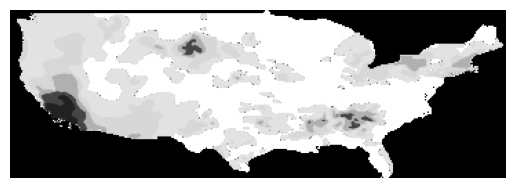

In [84]:
# Convert the images to grayscale
img1_gray = img1
img2_gray = img2

# Convert the images to numpy arrays
img1_array = np.array(img1_gray)
img2_array = np.array(img2_gray)

# Calculate the pixel-by-pixel difference
diff_array = np.abs(img1_array - img2_array)

# Display the difference image
plt.imshow(diff_array, cmap='gray')
plt.axis('off')
plt.show()
